## 1. Import Data

In [119]:
import os
import nltk
import re
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import Word

with open('../data/project_data/engineer_text.txt') as f:
    data = f.read()

## 2. Clean Data

In [120]:
data = data.lower()
tokens = nltk.word_tokenize(data)

print ("Uncleaned words = ", len(tokens))

## Remove Stop Words
stop = stopwords.words('english')

new_stop = ['and','experience','show','veteran','less','origin','sexual', 'orientation', 'dental', 'insurance', 'hour', 'shift','religion','sex','receive','consideration','pay', 'per','employment','opportunity','consideration', 'employment','job','description','start', 'job','click','gender','benefits', 'k','monday', 'friday','age', 'disability','please', 'visit','salary', 'range','characteristic', 'protected','minimum', 'qualifications','join','reasonable', 'accommodation', 'parental', 'leave', 'medical', 'vision', 'duties', 'responsibilities','business', 'needs','essential', 'functions','color','type', 'fulltime','verbal', 'communication','apply','work','national', 'status','closely','flexible', 'spending','’','ability', 'work','location', 'remote','capital', 'one','marital', 'status','team', 'members','work', 'location','applicants', 'without','paid', 'time','color','regard', 'race','apply','equal', 'employer','without', 'regard','united', 'states',"'s",'race', 'color','best', 'practices','physical', 'mental','health', 'savings','responsible','affirmative', 'action','iam','federal','state','local','required','ideal', 'candidate','individuals', 'disabilities','northrop', 'grumman','applicable', 'law','every', 'day','across', 'organization''travel', 'required','track', 'record''including', 'limited','employee', 'assistance','new', 'york','compensation', 'package','financial', 'services','travel', 'requirements']

technical_stop = ['identity', 'engineer','management','information', 'security','user']

stop.extend(new_stop + technical_stop)

token_list1 = [ ]
for token in tokens:
    if token not in stop:
        token_list1.append(token)

print("Removed Stop Words = ",len(token_list1))

## Remove numbers and punctuation
punctuation = re.compile(r'[-.?!,":;()&@#%^*·`$[]')
token_list2 = [ ]
for token in token_list1:
    word = punctuation.sub("", token)
    if len(word)>0:
        token_list2.append(word)
print("Removed numbers and punctuation = ",len(token_list2))

#print(token_list2)

Uncleaned words =  106050
Removed Stop Words =  63295
Removed numbers and punctuation =  49133


## 3. Filtering non-nouns and Frequency Analysis

In [121]:

tokens_pos_tag = nltk.pos_tag(token_list2)
pos_df = pd.DataFrame(tokens_pos_tag, columns = ('word','POS'))

pos_sum = pos_df.groupby('POS', as_index=False).count() # group by POS tags
pos_sum.sort_values(['word'], ascending=[False]) # in descending order of number of words per tag

,POS,word
11,NN,18245
7,JJ,8603
13,NNS,8383
24,VBG,3288
26,VBP,3044
17,RB,1271
27,VBZ,1034
23,VBD,1030
3,CD,984
22,VB,858


In [122]:
filtered_pos = [ ]
for one in tokens_pos_tag:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)
print ("Filtered words = ",len(filtered_pos))

fdist_pos = nltk.FreqDist(filtered_pos)
top_100_words = fdist_pos.most_common(100)
print(top_100_words)

Filtered words =  26797
[(('access', 'NN'), 692), (('solutions', 'NNS'), 380), (('years', 'NNS'), 358), (('systems', 'NNS'), 292), (('support', 'NN'), 273), (('data', 'NNS'), 271), (('development', 'NN'), 267), (('skills', 'NNS'), 255), (('technology', 'NN'), 218), (('knowledge', 'NN'), 215), (('design', 'NN'), 212), (('position', 'NN'), 205), (('software', 'NN'), 204), (('engineering', 'NN'), 193), (('environment', 'NN'), 187), (('technologies', 'NNS'), 183), (('application', 'NN'), 175), (('role', 'NN'), 166), (('directory', 'NN'), 153), (('employees', 'NNS'), 145), (('system', 'NN'), 143), (('teams', 'NNS'), 142), (('company', 'NN'), 141), (('applications', 'NNS'), 139), (('tools', 'NNS'), 125), (('authentication', 'NN'), 116), (('azure', 'NN'), 112), (('customer', 'NN'), 112), (('product', 'NN'), 112), (('service', 'NN'), 100), (('infrastructure', 'NN'), 100), (('enterprise', 'NN'), 100), (('program', 'NN'), 98), (('customers', 'NNS'), 97), (('products', 'NNS'), 97), (('process', '

In [123]:
top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))
top_words_df.head()

,pos,count
0,"(access, NN)",692
1,"(solutions, NNS)",380
2,"(years, NNS)",358
3,"(systems, NNS)",292
4,"(support, NN)",273


In [124]:
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) # split the tuple of POS
top_words_df = top_words_df.drop('pos', 1) # drop the previous column
top_words_df.head()

/var/folders/1q/13518n1s1n75fzdx64wlyz5w0000gn/T/ipykernel_33559/2050492311.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  top_words_df = top_words_df.drop('pos', 1) # drop the previous column


,count,Word
0,692,access
1,380,solutions
2,358,years
3,292,systems
4,273,support


## 4. Word Cloud

In [125]:
subset_pos = top_words_df[['Word', 'count']]
tuples_pos = [tuple(x) for x in subset_pos.values]

print(tuples_pos)

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(tuples_pos)

plt.show()

[('access', 692), ('solutions', 380), ('years', 358), ('systems', 292), ('support', 273), ('data', 271), ('development', 267), ('skills', 255), ('technology', 218), ('knowledge', 215), ('design', 212), ('position', 205), ('software', 204), ('engineering', 193), ('environment', 187), ('technologies', 183), ('application', 175), ('role', 166), ('directory', 153), ('employees', 145), ('system', 143), ('teams', 142), ('company', 141), ('applications', 139), ('tools', 125), ('authentication', 116), ('azure', 112), ('customer', 112), ('product', 112), ('service', 100), ('infrastructure', 100), ('enterprise', 100), ('program', 98), ('customers', 97), ('products', 97), ('process', 93), ('computer', 91), ('governance', 90), ('issues', 88), ('platform', 86), ('implementation', 86), ('life', 86), ('compliance', 85), ('organization', 83), ('administration', 82), ('cloud', 82), ('policies', 80), ('architecture', 79), ('world', 78), ('operations', 78), ('education', 77), ('integration', 76), ('stand

AttributeError: 'list' object has no attribute 'items'

ValueError: WordCloud has not been calculated, call generate first.

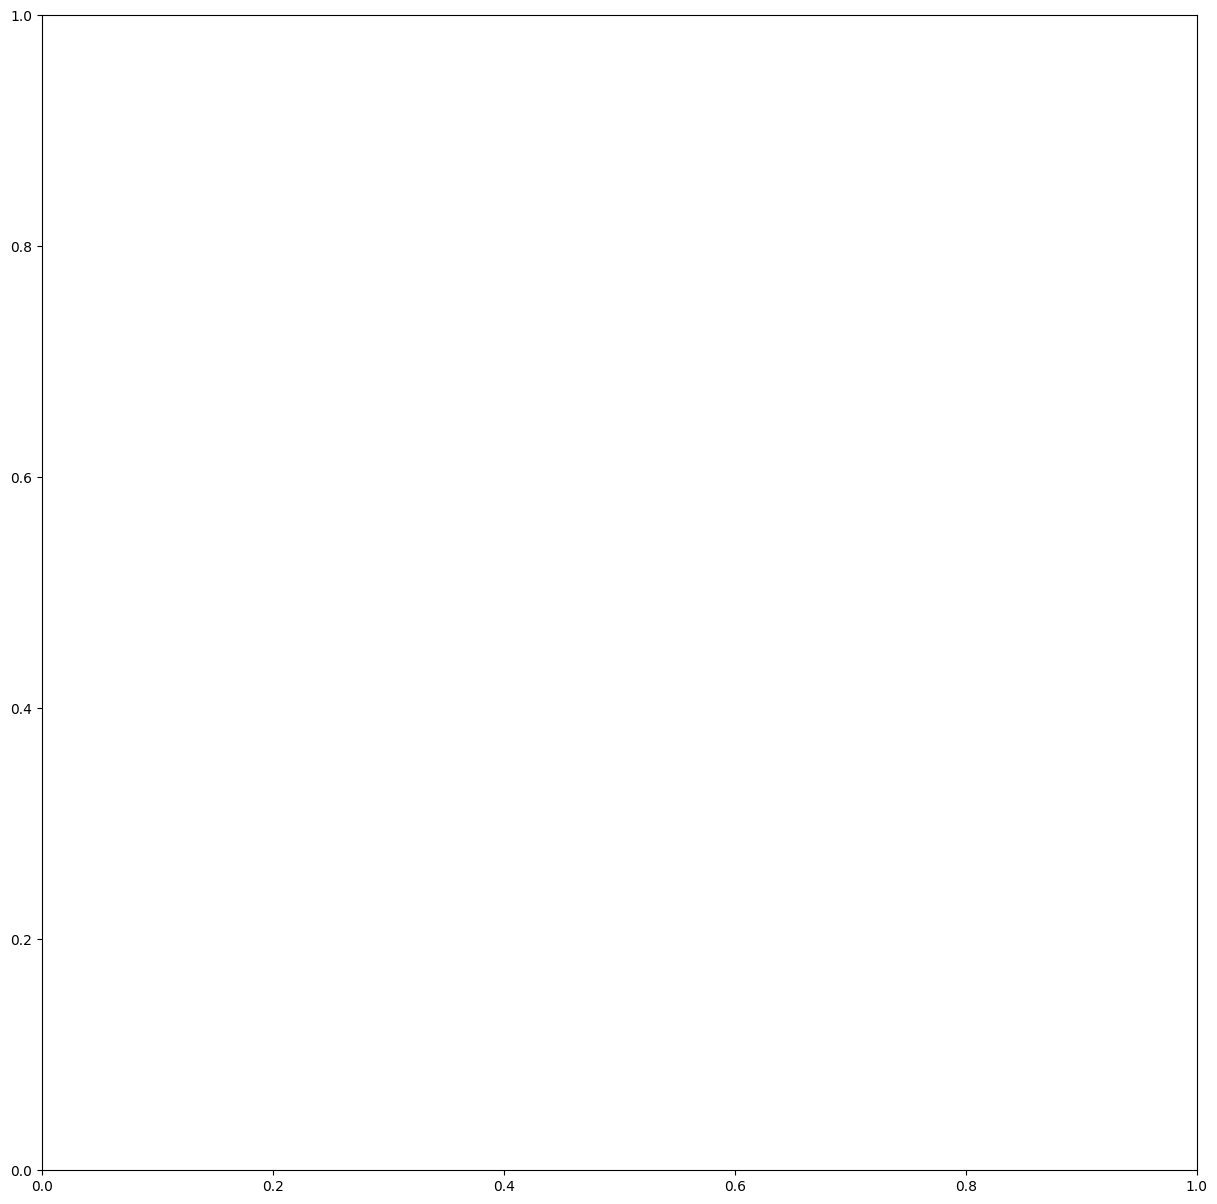

In [126]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")

## 5. BiGrams

In [102]:
bgs = nltk.bigrams(token_list2)
fdist2 = nltk.FreqDist(bgs) # selecting bigrams from tokens
bgs_100 = fdist2.most_common(100) # top-100 bigrams
bgs_df = pd.DataFrame(bgs_100, columns = ('bigram','count'))
print(bgs_df.to_markdown())

|    | bigram                              |   count |
|---:|:------------------------------------|--------:|
|  0 | ('active', 'directory')             |     114 |
|  1 | ('bachelor', 'degree')              |      67 |
|  2 | ('computer', 'science')             |      60 |
|  3 | ('privileged', 'access')            |      58 |
|  4 | ('access', 'control')               |      49 |
|  5 | ('software', 'development')         |      45 |
|  6 | ('3+', 'years')                     |      39 |
|  7 | ('azure', 'ad')                     |      38 |
|  8 | ('years', 'preferred')              |      31 |
|  9 | ('degree', 'computer')              |      30 |
| 10 | ('5+', 'years')                     |      29 |
| 11 | ('access', 'solutions')             |      28 |
| 12 | ('directory', 'services')           |      28 |
| 13 | ('written', 'skills')               |      28 |
| 14 | ('related', 'field')                |      28 |
| 15 | ('single', 'signon')                |      27 |
| 16 | ('a

In [112]:
bgs_df['phrase'] = bgs_df['bigram'].apply(lambda x: x[0]+" "+x[1]) # merging the tuple into a string
bgs_df['filter_bgs'] = bgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuation
bgs_df = bgs_df[bgs_df.filter_bgs == False] # removing strings with numbers and punctuation
bgs_df = bgs_df.drop('bigram', 1)
bgs_df = bgs_df.drop('filter_bgs', 1) # removing the excess columns
bgs_df.reset_index()
bgs_df.head(10) #Final bigrams

KeyError: 'bigram'

In [105]:
tgs = nltk.trigrams(token_list2) 
fdist3 = nltk.FreqDist(tgs) # selecting trigrams from tokens
tgs_100 = fdist3.most_common(100) # top-100 trigrams
tgs_df = pd.DataFrame(tgs_100, columns = ('trigram','count'))
tgs_df.head()

,trigram,count
0,"(degree, computer, science)",24
1,"(knowledge, skills, abilities)",20
2,"(active, directory, azure)",17
3,"(azure, active, directory)",17
4,"(subject, matter, expert)",15


In [106]:
tgs_df['phrase'] = tgs_df['trigram'].apply(lambda x: x[0]+" "+x[1]+" "+x[2]) # merging the tuple into a string
tgs_df['filter_tgs'] = tgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuation
tgs_df.head()

,trigram,count,phrase,filter_tgs
0,"(degree, computer, science)",24,degree computer science,False
1,"(knowledge, skills, abilities)",20,knowledge skills abilities,False
2,"(active, directory, azure)",17,active directory azure,False
3,"(azure, active, directory)",17,azure active directory,False
4,"(subject, matter, expert)",15,subject matter expert,False


In [107]:
tgs_df = tgs_df[tgs_df.filter_tgs == False] # removing strings with numbers and punctuation
tgs_df = tgs_df.drop('trigram', 1)
tgs_df = tgs_df.drop('filter_tgs', 1) # removing the excess columns
tgs_df.reset_index()
tgs_df.head(20) #Final trigrams

/var/folders/1q/13518n1s1n75fzdx64wlyz5w0000gn/T/ipykernel_33559/1326529013.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tgs_df = tgs_df.drop('trigram', 1)
/var/folders/1q/13518n1s1n75fzdx64wlyz5w0000gn/T/ipykernel_33559/1326529013.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tgs_df = tgs_df.drop('filter_tgs', 1) # removing the excess columns


,count,phrase
0,24,degree computer science
1,20,knowledge skills abilities
2,17,active directory azure
3,17,azure active directory
4,15,subject matter expert
5,15,bachelor degree computer
6,15,single signon sso
7,14,based access control
8,14,microsoft active directory
9,12,role based access
